# Genetic algorithms
In this lab we will use a genetic algorithm to attack a 'toy', but still highly nontrivial, discrete optimisation problem.  The main task will be to write functions that do each of the component parts of the genetic algorithm.

In [847]:
import numpy as np
from numpy.linalg import det
import matplotlib.pyplot as plt

## Hadamard's maximal determinant problem

The following problem was first examined by Hadamard.  Suppose we have an $N\times N$ matrix $M$, where each element of $M$ can only be either 0 or 1.  For example, if $N=3$, $M$ could be
$$
M = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 0 & 1 \\ 1& 1 & 1 \end{bmatrix}.
$$

The question is: for a given size $N$, what is the largest possible <i>determinant</i> of $M$? How do we find a matrix that has this largest determinant?

Some results are known for matrices of specific sizes, and brute force allows for results for small $N$, but the general case is an open question.  The first unknown value is for matrices of size $N=21$.

The first 20 known values are summarised below*:

| $N$ | 1 | 2 | 3 | 4 | 5 | 6 |7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 |
| --- | --- | --- | --- | --- | --- | --- | --- |  --- | --- | --- | --- |  --- | --- | --- |
|$\det(M)$ | 1 | 1 | 2 | 3 | 5 | 9 | 32 | 56 | 144 | 320 | 1458 |  9477 | 25515 | 3645 |

| $N$ | 15 | 16 | 17 | 18 | 19 | 20 |
| --- | --- | --- | --- | --- | --- | --- |
|$\det(M)$ | 131072 | 327680 | 1114112 | 3411968 | 19531250 | 56640625 |


$*$ - Sloane's A003432 : Hadamard maximal determinant problem: largest determinant of a (real) ${0,1}$-matrix of order $n$. The On-Line Encyclopedia of Integer Sequences. OEIS Foundation.

In Python we can evaluate the determinant using `det` function in the `numpy.linalg` module.

In [848]:
p = np.random.randint(2, size=(10,10))
print(p)

[[0 1 0 0 0 1 0 1 1 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 1 0 0 0 0 0 1]
 [1 0 0 0 1 1 0 1 0 1]
 [0 1 1 0 0 1 0 1 0 0]
 [1 0 1 1 0 1 0 1 0 1]
 [0 1 0 0 0 1 1 1 0 0]
 [1 0 0 1 0 0 1 1 1 1]
 [0 0 1 0 1 0 0 0 0 1]
 [0 1 1 1 0 1 1 0 1 1]]


The main aim of this tutorial will be to develop a genetic algorithm that attempts to find an maximal determinant for a given size of matrix $N$.  Recall that the main steps in the genetic algorithm are:

1. Selection (choose the 'fitter' chromosomes for the crossover stage),
2. Crossover ('mating': repopulate the population with mixed versions of the chromosomes picked by selection),
3. Mutation (with a small probability, change some of the elements of each chromosome).

To implement these operations, let's define three Python functions that compute the cost of a chromosome, perform a crossover between two chromosomes at a point $X$, and mutate a chromosome and a certain point $X$.

# Exercise 1
Try to write three functions:
1. `costFun(p,N)`, that computes the cost of a chromosome (that is, the determinant of `p`, written in Matrix form)
2. `mutateFun(p,X)`, that mutates a chromosome `p` at a point X and returns the new chromosome `q`
3. `crossFun(p1,p2,X)`, that crosses over `p1` and `p2` at X and returns new chromosomes `q1` and `q2`

Note that we want to input chromosomes as one dimensional arrays (that is, $N^2 \times 1$ vectors, rather than $N\times N$ matrices).  The `reshape` command will be useful here (e.g., try `p.reshape(N,N)` to turn a vector into a matrix).

You should make sure these functions do what you expect before trying to run the genetic algorithm (e.g, try calling them with some random or made up chromosomes and see what happens).

In [849]:
#Chromosomes will be of this form, e.g. for N=5
N = 10
p = np.random.randint(2, size=(N**2))
print(p)

[1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1]


In [850]:
def costFun(p, N):
    '''costFun computes the cost of a given chromosome'''
    c = 0
    return c

In [851]:
def costFun(p,N):
    pnew=p.reshape(N,N)
    c=np.linalg.det(pnew)
    return c

costFun(p,N)

-15.999999999999998

In [852]:
def mutateFun(p,X):
    '''mutateFun mutates a chromosome at a point X'''
    q = 0
    return q

In [853]:
def mutateFun(p,X):
    p[X]=(p[X]-1)%2
    return p

print(mutateFun(p,0))

[0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 1]


In [854]:
def crossFun(p1,p2,X):
    '''crossFun performs a crossover between two parent chromosomes'''
    q1 = 0
    q2 = 0
    return q1, q2

In [855]:
p1 = np.random.randint(2, size=(N**2))
p2 = np.random.randint(2, size=(N**2))
def crossFun(p1,p2,X):
    c1=[]
    c2=[]
    c1.append([*p1[0:X+1],*p2[X+1:N**2]])
    c2.append([*p2[0:X+1],*p1[X+1:N**2]])
    c1=c1[0]
    c2=c2[0]
    return c1,c2

print(crossFun(p1,p2,80))

([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1])


# Exercise 2

If you have successfully defined the three functions above, the below function will run the algorithm to minimise the cost function using a genetic algorithm.  You may want to try to understand how this code works, make it more efficient, or see if you can write your own.

In [856]:
def runAlgorithm(N, nPop=100, nGen=100, mutateProb = 0.1):
    '''runAlgorithm runs the genetic algorithm to compute a matrix of maximal determinant'''
    
    #Initialise with random chromosomes
    P = np.random.randint(2, size=(N**2,nPop))
    M = np.zeros((N**2,nPop))
    costs = np.zeros(nPop)

    #Initial costs
    for k in range(nPop):
        costs[k] = costFun(P[:,k], N)

    #Save the best chromosome so far
    cBest = min(costs)      
    pBest = np.array(P[:,np.argmin(costs)])

    #Loop over generations
    for j in range(nGen):

        #Selection: Tournament
        for k in range(nPop):
            i1, i2 = np.random.randint(nPop), np.random.randint(nPop)
            if costs[i1] < costs[i2]:
                M[:,k] = P[:,i1]
            else:
                M[:,k] = P[:,i2]

        #Crossover
        for k in range(0,nPop,2):
            X = np.random.randint(N**2)
            (P[:,k], P[:,k+1]) = crossFun(M[:,k], M[:,k+1], X)

        #Mutation
        for k in range(nPop):
            m = np.random.random()
            if m < mutateProb:
                X = np.random.randint(N**2)
                P[:,k] = mutateFun(P[:,k], X) 

        #Compute new vector of costs
        for k in range(nPop):
            costs[k] = costFun(P[:,k], N)

        #if a new best chromosome found, update
        if min(costs) < cBest:
            cBest = min(costs)      
            pBest = np.array(P[:,np.argmin(costs)])
            print('Generation ' + str(j) + ': New minimum:' + str(cBest))

    #Reshape chromosome back into matrix
    pBest = pBest.reshape(N,N)
    
    #Return the optimal determinant found and the matrix that goes with it
    return(cBest, pBest)

Try to run the algorithm to compute some matrices with maximal (or at least, close to maximal) determinant.  Note that the code has three numerical parameters, whose default values are set in the function: `nGen` (the number of generations to run), `nPop` (the number of chromosomes in the population), and `mutateProb` (the probability of each chromosome mutating each generation).  See if changing these values effects the value of the solution you obtain.

In [857]:
cBest, pBest = runAlgorithm(10, nPop = 100, nGen=100, mutateProb = 0.1)
print(pBest)
print(cBest)

Generation 1: New minimum:-46.0
Generation 24: New minimum:-51.0
Generation 27: New minimum:-52.0
Generation 28: New minimum:-60.0
Generation 31: New minimum:-62.0
Generation 33: New minimum:-65.0
Generation 37: New minimum:-68.0
Generation 38: New minimum:-80.0
Generation 40: New minimum:-84.0
Generation 42: New minimum:-100.0
Generation 43: New minimum:-100.0
Generation 44: New minimum:-104.0
Generation 47: New minimum:-114.0
Generation 48: New minimum:-126.0
Generation 49: New minimum:-138.0
Generation 51: New minimum:-150.0
Generation 52: New minimum:-152.0
Generation 56: New minimum:-188.0
Generation 58: New minimum:-196.0
Generation 59: New minimum:-212.0
Generation 65: New minimum:-228.0
Generation 68: New minimum:-240.0
Generation 74: New minimum:-264.0
Generation 87: New minimum:-264.0
[[1 1 0 0 1 0 1 0 1 0]
 [1 0 0 1 1 0 0 1 0 1]
 [1 0 1 0 0 0 1 0 0 1]
 [1 1 1 0 0 1 0 1 0 0]
 [0 0 1 0 1 1 1 1 1 0]
 [1 0 1 1 0 0 0 1 1 0]
 [1 0 0 1 0 1 0 0 1 1]
 [0 1 1 0 1 0 0 0 1 1]
 [0 1 0 1 

One way to visualise a matrix is with what's known as a sparsity plot.  This plot makes a black square wherever there is a nonzero element of a matrix: 

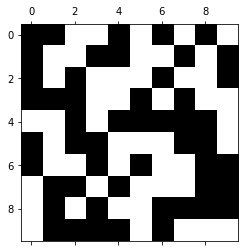

In [858]:
plt.spy(pBest)
plt.show()

If you are comfortable with the code for the genetic algorithm you could try to extend it a number of ways, for example:
* Change the selection scheme to Roulette rather than tournament,
* Change the crossover scheme to two or multi-point crossover,
* Adapt the cost and crossover functions appropriate for travelling salesperson problems.